<a href="https://colab.research.google.com/github/PerceptronV/Covid-Predictor/blob/main/Diforona_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) Vincent Song 2020

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

Data for this project is taken from: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (<https://github.com/CSSEGISandData/COVID-19>)

#Training

In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle as pkl

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.titlecolor']='green'
mpl.rcParams['axes.labelcolor']='red'
mpl.rcParams['xtick.color'] = 'red'
mpl.rcParams['ytick.color'] = 'red'

In [2]:
sub='/content/'
fname='corona-series.csv'
path = tf.keras.utils.get_file(
    origin='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    fname=fname,cache_subdir=sub)
csv_path=sub+fname
df = pd.read_csv(csv_path).fillna(0)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head(df.shape[0]+1)

327680/322329 [==============================] - 0s 0us/step


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20
0,0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268
1,0,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,85

In [3]:
def find(key,dataframe):
  key = key.lower().strip()
  ret = []
  if key[-1] == '*':
    key = key[:-1]
    for i in range(dataframe.shape[0]):
      if key == str(dataframe.iloc[i][0]).lower() or key == str(dataframe.iloc[i][1]).lower():
        ret.append(dataframe.iloc[i])
  else:
    for i in range(dataframe.shape[0]):
      if (key == str(dataframe.iloc[i][0]).lower()) or (key == str(dataframe.iloc[i][1]).lower() and dataframe.iloc[i][0]==0):
        ret.append(dataframe.iloc[i])
    if ret == []:
      for i in range(dataframe.shape[0]):
        if key == str(dataframe.iloc[i][1]).lower():
          ret.append(dataframe.iloc[i])
  return ret

def plot(key, dataframe, save = False, filename = None):
  a = find(key, df)
  y = 'confirmed cases'
  x = 'number of days since 22nd Jan'
  for i in range(len(a)):
    vals = np.asarray(a[i][4:])
    plt.plot(vals)
    plt.ylabel(y)
    plt.xlabel(x)
    try:
      t = a[i][0] + ', ' + a[i][1]
    except:
      t = a[i][1]
    
    plt.title(t)
    if save:
      plt.savefig(filename if filename != None else t, dpi = 300)
    plt.show()
  return a

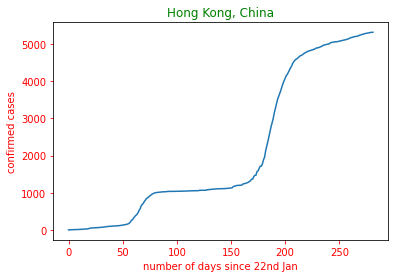

In [4]:
_ = plot('hong kong', df, True)

In [5]:
df_data = df.iloc[0:,4:]
np_data = np.asarray(df_data.values,int)
print(np_data[0])
print(np_data.shape)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     1     1     1
     1     1     1     1     1     1     1     1     1     1     4     4
     5     7     7     7    11    16    21    22    22    22    24    24
    40    40    74    84    94   110   110   120   170   174   237   273
   281   299   349   367   423   444   484   521   555   607   665   714
   784   840   906   933   996  1026  1092  1176  1279  1351  1463  1531
  1703  1828  1939  2171  2335  2469  2704  2894  3224  3392  3563  3778
  4033  4402  4687  4963  5226  5639  6053  6402  6664  7072  7653  8145
  8676  9216  9998 10582 11173 11831 12456 13036 13659 14525 15205 15750
 16509 17267 18054 18969 19551 20342 20917 21459 22142 22890 23546 24102
 24766 25527 26310 26874 27532 27878 28424 28833 29157 29481 29640 30175
 30451 30616 30967 31238 31517 31836 32022 32324 32

In [6]:
def compute_dif(a):
  r = []
  for i in range(len(a) - 1):
    r.append(a[i + 1] - a[i])
  return np.asarray(r)

def build_orig(b, a):
  r = [b]
  for i in a:
    b += i[0]
    r.append(b)
  return np.asarray(r, int)

def standardize(a, d = None):
  m = a.mean()
  s = a.std()
  if not (m == 0 or s == 0):
    a = (a - m)/s
    if d != None:
      d = (d - m)/s
      return a, d, m, s
    return a, m, s
  else:
    if d != None:
      return a, d, m, s
    return a, m, s

def expand(a):
  r = np.expand_dims(np.asarray(a), -1)
  return r

In [7]:
data = []
labels = []
metadata = []
h_size = 9

for i in np_data:
  for j in range(0, len(i) - h_size):
    difs = compute_dif(i[j:][:h_size + 1])
    new_dat = difs[:-1]
    new_lab = difs[-1]
    new_dat, new_lab, mean, std = standardize(new_dat, new_lab)

    metadata.append([i[j], mean, std])
    data.append(new_dat)
    labels.append(new_lab)

data = expand(data)
labels = expand(labels)

In [8]:
data.shape, labels.shape

((73164, 8, 1), (73164, 1))

In [9]:
samp_index = -1
aux = metadata[samp_index]
samp_dat = data[samp_index] * aux[2] + aux[1]
samp_lab = int(labels[samp_index] * aux[2] + aux[1])
samp_dat = build_orig(aux[0], samp_dat)
samp_lab += samp_dat[-1]

print(samp_dat)
print(samp_lab)
print(aux)
print(np_data[-1][-10:])

[8187 8215 8242 8257 8269 8276 8303 8315 8320]
8349
[8187, 16.625, 8.788308995478026]
[8187 8215 8242 8257 8269 8276 8303 8315 8320 8349]


In [10]:
np.random.shuffle(data)
np.random.shuffle(labels)

In [11]:
ratio = 9/10
train_no = int(labels.shape[0]*ratio)
test_no = labels.shape[0] - train_no
print(train_no)
print(test_no)

65847
7317


In [12]:
train_data = data[:train_no]
test_data = data[train_no:]
train_labels = labels[:train_no]
test_labels = labels[train_no:]

In [13]:
merge=[[train_data, train_labels], [test_data, test_labels]]
pkl.dump(merge, open('std_data.data','wb'))

In [14]:
BATCH_SIZE = 64
SEED = 13

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(BATCH_SIZE, drop_remainder=False).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(BATCH_SIZE, drop_remainder=False)

In [16]:
mse = tf.keras.losses.MeanSquaredError()
mape = tf.keras.losses.MeanAbsolutePercentageError()
mae = tf.keras.losses.MeanAbsoluteError()
def discounted_double_neg_loss(y_true, y_pred):
  neg_mask = tf.keras.backend.sign(y_true-y_pred) / 2 + 0.5
  pos_mask = tf.keras.backend.sign(y_pred-y_true) / 2 + 0.5
  return neg_mask*mae(y_true,y_pred)+mape(y_true,y_pred)
  #return (1+(y_true-y_pred)/y_true)*((y_true+2)**2)*neg_mask*mae(y_true,y_pred)+mape(y_true,y_pred)

In [17]:
def make_model():
  model=tf.keras.models.Sequential([
                                    
    tf.keras.layers.GRU(
         64,
         input_shape=(h_size - 1, 1),
         return_sequences = False),
    tf.keras.layers.Dense(64, activation = 'tanh'),
    tf.keras.layers.Dense(1)], name='Predictor')
  return model

In [18]:
optim = tf.keras.optimizers.Adam(1e-5)

In [19]:
model = make_model()
model.compile(optimizer = optim, loss = mse)
model.summary()

Model: "Predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 17,089
Trainable params: 17,089
Non-trainable params: 0
_________________________________________________________________


In [20]:
EPOCHS = 10
model.fit(train_dataset, epochs=EPOCHS, steps_per_epoch = 10000)

Epoch 1/10
10000/10000 [==============================] - 30s 3ms/step - loss: 193.6832
Epoch 2/10
10000/10000 [==============================] - 30s 3ms/step - loss: 205.2416
Epoch 3/10
10000/10000 [==============================] - 31s 3ms/step - loss: 205.2162
Epoch 4/10
10000/10000 [==============================] - 30s 3ms/step - loss: 196.0023
Epoch 5/10
10000/10000 [==============================] - 30s 3ms/step - loss: 200.2696
Epoch 6/10
10000/10000 [==============================] - 30s 3ms/step - loss: 206.7169
Epoch 7/10
10000/10000 [==============================] - 30s 3ms/step - loss: 203.0479
Epoch 8/10
10000/10000 [==============================] - 30s 3ms/step - loss: 193.6424
Epoch 9/10
10000/10000 [==============================] - 30s 3ms/step - loss: 205.2717
Epoch 10/10
10000/10000 [==============================] - 30s 3ms/step - loss: 206.5164


In [21]:
model.save_weights('weights.h5')

In [22]:
model.evaluate(test_dataset)

115/115 [==============================] - 0s 2ms/step - loss: 19.8559


19.855932235717773

##Saving everything

In [23]:
model.save('corona.h5', include_optimizer = False)

#Predicting

In [24]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle as pkl

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.titlecolor']='cyan'
mpl.rcParams['axes.labelcolor']='white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

In [25]:
def find(key,dataframe):
  key = key.lower().strip()
  ret = []
  if key[-1] == '*':
    key = key[:-1]
    for i in range(dataframe.shape[0]):
      if key == str(dataframe.iloc[i][0]).lower() or key == str(dataframe.iloc[i][1]).lower():
        ret.append(dataframe.iloc[i])
  else:
    for i in range(dataframe.shape[0]):
      if (key == str(dataframe.iloc[i][0]).lower()) or (key == str(dataframe.iloc[i][1]).lower() and dataframe.iloc[i][0]==0):
        ret.append(dataframe.iloc[i])
    if ret == []:
      for i in range(dataframe.shape[0]):
        if key == str(dataframe.iloc[i][1]).lower():
          ret.append(dataframe.iloc[i])
  return ret

def plot(key, dataframe, save = False, filename = None):
  a = find(key, df)
  y = 'confirmed cases'
  x = 'number of days since 22nd Jan'
  for i in range(len(a)):
    vals = np.asarray(a[i][4:])
    plt.plot(vals)
    plt.ylabel(y)
    plt.xlabel(x)
    try:
      t = a[i][0] + ', ' + a[i][1]
    except:
      t = a[i][1]
    
    plt.title(t)
    if save:
      plt.savefig(filename if filename != None else t, dpi = 300)
    plt.show()
  return a

In [26]:
def compute_dif(a):
  r = []
  for i in range(len(a) - 1):
    r.append(a[i + 1] - a[i])
  return np.asarray(r)

def build_orig(b, a):
  r = [b]
  for i in a:
    b += i[0]
    r.append(b)
  return np.asarray(r, int)

def standardize(a, d = None):
  m = a.mean()
  s = a.std()
  if not (m == 0 or s == 0):
    a = (a - m)/s
    if d != None:
      d = (d - m)/s
      return a, d, m, s
    return a, m, s
  else:
    if d != None:
      return a, d, m, s
    return a, m, s

def expand(a):
  r = np.expand_dims(np.asarray(a), -1)
  return r

In [27]:
def predict(feed, model):
  data, mean, std = standardize(compute_dif(feed))
  inp = np.expand_dims(expand(data), 0)
  pred = model.predict(inp)[0][0]
  ret = pred * std + mean + feed[-1]
  return ret

In [28]:
sub='/content/'
fname='corona-series.csv'
path = tf.keras.utils.get_file(
    origin='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    fname=fname,cache_subdir=sub)
csv_path=sub+fname
df = pd.read_csv(csv_path).fillna(0)

model = tf.keras.models.load_model('corona.h5')

##Predicting Past Values from Hong Kong

In [29]:
def create_time_steps(length):
  return list(range(-length, 0))
  
def multi_step_plot(history, true_future, prediction):
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [30]:
ind = -100
preds = []
trues = []
hk = list(find('hong kong', df))[0]

for i in range(ind, -9, 1):
  needs = 9 - len(preds)
  if needs > 0:
    feed = list(hk.values[i:i + 9][:needs])
    feed.extend(preds)
  else:
    feed = preds[-9:]
  
  feed = np.asarray(feed, dtype=int)
  preds.append(predict(feed, model))
  trues.append(hk.values[i + 9])

In [31]:
pre=list(hk.values[4:ind+9])
pre

[0,
 2,
 2,
 5,
 8,
 8,
 8,
 10,
 10,
 12,
 13,
 15,
 15,
 17,
 21,
 24,
 25,
 26,
 29,
 38,
 49,
 50,
 53,
 56,
 56,
 57,
 60,
 62,
 63,
 68,
 68,
 69,
 74,
 79,
 84,
 91,
 92,
 94,
 95,
 96,
 100,
 100,
 105,
 105,
 107,
 108,
 114,
 115,
 120,
 126,
 129,
 134,
 140,
 145,
 155,
 162,
 181,
 208,
 256,
 273,
 317,
 356,
 386,
 410,
 453,
 519,
 561,
 641,
 682,
 714,
 765,
 802,
 845,
 862,
 890,
 914,
 935,
 960,
 973,
 989,
 1000,
 1004,
 1009,
 1012,
 1017,
 1017,
 1021,
 1024,
 1025,
 1025,
 1029,
 1033,
 1035,
 1035,
 1037,
 1037,
 1037,
 1037,
 1037,
 1037,
 1039,
 1039,
 1039,
 1040,
 1040,
 1040,
 1044,
 1044,
 1044,
 1047,
 1047,
 1047,
 1050,
 1051,
 1052,
 1052,
 1055,
 1055,
 1055,
 1055,
 1055,
 1065,
 1065,
 1065,
 1065,
 1065,
 1066,
 1066,
 1079,
 1082,
 1084,
 1087,
 1093,
 1093,
 1099,
 1102,
 1105,
 1106,
 1107,
 1107,
 1107,
 1107,
 1108,
 1109,
 1109,
 1112,
 1112,
 1120,
 1124,
 1124,
 1128,
 1131,
 1161,
 1177,
 1179,
 1193,
 1196,
 1197,
 1199,
 1203,
 1205,


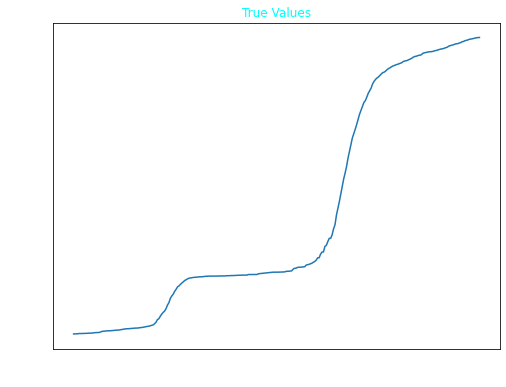

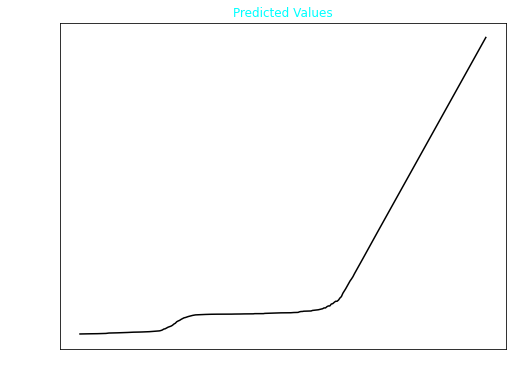

In [32]:
pre=list(hk.values[4:ind+9])
pre.extend(trues)
y='confirmed cases'
x='number of days since 22nd Jan'
plt.plot(pre)
plt.ylabel(y)
plt.xlabel(x)
plt.title('True Values')
plt.show()
pre=list(hk.values[4:ind+9])
pre.extend(preds)
plt.plot(pre,'black')
plt.ylabel(y)
plt.xlabel(x)
plt.title('Predicted Values')
plt.show()

##Predicting Past Values from UK

In [33]:
ind = -10
feed = list(find('united kingdom',df)[0].values[ind:ind+9])
print(feed)
print(list(find('united kingdom',df))[0].values[ind+9])
predict(feed, model)

[762542, 789229, 810467, 830998, 854010, 873800, 894690, 917575, 942275]
965340


965811.8174702175

##General Prediction Tool

In [34]:
print('Future predictions\n')
default=['hong kong','united kingdom','china','us']
for inp in default:
  try:
    print(inp)
    col=list(find(inp,df))
    try:
      for i in range(len(col)):
          col[i]=col[i].values[-9:]
      feed=col[0]
      if len(col)>1:
        for i in col[1:]:
          feed=feed+i
      print(feed)
      print(str(predict(feed, model))+'\n')
    except:
      pass
  except:
    print('Error with default list')
while (1):
  inp=input('Place: ')
  if inp is not '':
    col=list(find(inp,df))
    try:
      for i in range(len(col)):
          col[i]=col[i].values[-9:]
      feed=col[0]
      if len(col)>1:
        for i in col[1:]:
          feed=feed+i
      print(feed)
      print(str(predict(feed,model,aux,True,corrector))+'\n')
    except:
      pass
  else:
    break
print('Session terminated')

Future predictions

hong kong
[5269 5280 5284 5289 5295 5303 5308 5310 5313]
5319.695043106265

united kingdom
[789229 810467 830998 854010 873800 894690 917575 942275 965340]
987960.231842594

china
[91044 91073 91108 91128 91151 91175 91222 91271 91299]
91334.19022795487

us
[8337128 8408803 8492534 8576237 8637028 8703811 8777432 8856413 8944934]
9025256.591290869

Place: 
Session terminated
